# Przykładowy model predykcyjny na podstawie cosine similarity

## Wczytanie danych

In [2]:
import requests

url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

r = requests.get(url, allow_redirects=True)
open('data.zip', 'wb').write(r.content)
!unzip data.zip -d new/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams["figure.figsize"] = (20,5)
dirpath = './new/ml-latest-small/'

movies, ratings, tags, links = load_movies_ratings_tags_links(dirpath)

./new/ml-latest-small/


In [ ]:
poster_url = "https://image.tmdb.org/t/p/w600_and_h900_bestv2{}"
apikey = "c64ddb28627cb5229e96a8538d22e8f8"
endpoint_url = "https://api.themoviedb.org/3/movie/{}?api_key=c64ddb28627cb5229e96a8538d22e8f8"
cast_endpoint_url = "https://api.themoviedb.org/3/movie/{}/credits?api_key=c64ddb28627cb5229e96a8538d22e8f8"


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import base64


def get_poster_base64(tmdbId):
  try:
    response = requests.get(endpoint_url.format(tmdbId))
    path = response.json()['poster_path']
    
    response = requests.get(poster_url.format(path))
    img = Image.open(BytesIO(response.content))
    img.thumbnail((128, 128), Image.LANCZOS)
    return img

  except:
    print(tmdbId)
    return None


def get_poster_for_movie(movieId):
    tmdbId = links[links['movieId'] == movieId]['tmdbId'].iloc[0]

    return get_poster_base64(tmdbId)

In [ ]:
import nltk
import string

nltk.download("popular")

def preprocess_tagline(tagline):
  tagline = tagline.lower()

  text_p = "".join([char for char in tagline if char not in string.punctuation])
  
  return text_p

def get_movie_data(tmdbId):
  try:
    response = requests.get(cast_endpoint_url.format(tmdbId))
    cast = response.json()['cast']
    crew = response.json()['crew']
    actors = []
    for actor in cast:
      if actor['popularity'] >= 10:
        actors.append(actor['name'])

    for actor in crew:
      if actor['popularity'] >= 8:
        actors.append(actor['name'])
                      
    response = requests.get(endpoint_url.format(tmdbId))
    tagline = response.json()['overview']

    return (actors, tagline)
  except:
    print(tmdbId)
    return [], ""

def get_data_for_movie(movieId):
    tmdbId = links[links['movieId'] == movieId]['tmdbId'].iloc[0]

    return get_movie_data(tmdbId)

x, d = get_movie_data(550)

' '.join(x) + preprocess_tagline(d)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

'Edward Norton Brad Pitt Helena Bonham Carter Jared Leto Holt McCallany David Fincher David Leitch Mickie McGowana tickingtimebomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy their concept catches on with underground fight clubs forming in every town until an eccentric gets in the way and ignites an outofcontrol spiral toward oblivion'

In [ ]:
def get_tags_for_movie(movieId):
  return tags[tags['movieId'] == movieId]['tag'].tolist()

  
def get_similars(title, n=10):
  idx = movies[movies['title'] == title].index[0]
  queried_movie = movies.iloc[idx]

  index_score = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(index_score, key=lambda x: x[1], reverse=True)

  top_10 = sim_scores[1:n+1]

  fig, ax = plt.subplots(math.ceil(n/5), 5, layout="compressed", figsize=(10, 8))
  axes = ax.flat

  print(f'Propozycje dla: {queried_movie.title} ({queried_movie.genres}) ({get_tags_for_movie(queried_movie["movieId"])})')

  i = 0
  for (top_idx, similarity) in top_10:
    row_movie = movies.iloc[top_idx]

    similarity = "{:.3f}".format(similarity)
    row_tags = ', '.join(get_tags_for_movie(row_movie['movieId']))

    print(f'{row_movie.title}, cosine_sim: {similarity}')
    print(f'  > Gatunki: {row_movie.genres}')
    print(f'  > Tagi: {row_tags}')
    

    axes[i].imshow(get_poster_for_movie(row_movie['movieId']), aspect='auto')
    i += 1



In [ ]:

def pool_data(row):

  cast, tagline = get_data_for_movie(row)

  return ' '.join(cast) + preprocess_tagline(tagline)



In [ ]:
# ["nan","nan","nan","nan","12773.0","17882.0","68149.0","24549.0","14980.0","164721.0","140207.0","192936.0","876.0","149645.0","nan","8677.0","13057.0","2670.0","215993.0","13519.0","152426.0","30983.0","7096.0","110147.0","206216.0","19341.0","36763.0","13716.0","nan","10700.0","nan","58923.0","17266.0","253768.0","49870.0","244797.0","53094.0","118309.0","225130.0","114796.0","13905.0","12224.0","51247.0","9795.0","18884.0","14301.0","67479.0","19422.0","17632.0","61872.0","141714.0","nan","183894.0","110639.0","367647.0","202241.0","58423.0","94174.0","192695.0","26397.0","147269.0","83191.0","193976.0","202043.0","263947.0","215999.0","193380.0","147538.0","69372.0","134481.0","51452.0","253941.0","230657.0","110414.0","178446.0","289394.0","133365.0","202249.0","189197.0","125336.0","278468.0","321640.0","65973.0","62931.0","278604.0","134777.0","27934.0","200813.0","127605.0","72093.0","72095.0","369879.0","370646.0","333040.0","378779.0","192040.0","409696.0","432192.0","331214.0","420714.0","409926.0","419787.0","65595.0","213313.0","406403.0","26787.0","374430.0","461805.0","412103.0","466986.0","463612.0","106035.0","502892.0","500609.0"]

movies['extra_metadata'] = movies['movieId'].apply(pool_data)

nan
nan
nan
nan
12773.0
17882.0
68149.0
24549.0
14980.0
164721.0
140207.0
192936.0
876.0
149645.0
nan
8677.0
13057.0
2670.0
215993.0
13519.0
152426.0
30983.0
7096.0
110147.0
206216.0
19341.0
36763.0
13716.0
nan
10700.0
nan
58923.0
17266.0
253768.0
49870.0
244797.0
53094.0
118309.0
225130.0
114796.0
13905.0
12224.0
51247.0
9795.0
18884.0
14301.0
67479.0
19422.0
17632.0
61872.0
141714.0
nan
183894.0
110639.0
367647.0
202241.0
58423.0
94174.0
192695.0
26397.0
147269.0
83191.0
193976.0
202043.0
263947.0
215999.0
193380.0
147538.0
69372.0
134481.0
51452.0
253941.0
230657.0
110414.0
178446.0
289394.0
133365.0
202249.0
189197.0
125336.0
278468.0
321640.0
65973.0
62931.0
278604.0
134777.0
27934.0
200813.0
127605.0
72093.0
72095.0
369879.0
370646.0
333040.0
378779.0
192040.0
409696.0
432192.0
331214.0
420714.0
409926.0
419787.0
65595.0
213313.0
406403.0
26787.0
374430.0
461805.0
412103.0
466986.0
463612.0
106035.0
502892.0
500609.0


In [58]:
movies = pd.read_csv('movies.csv', encoding='utf-8-sig', engine='python')
df = pd.read_csv('output.csv', engine='python')
tags=pd.read_csv('tags.csv', engine='python')

In [59]:
df.columns

Index(['Unnamed: 0', 'movieId', 'title', 'genres', 'extra_metadata', 'new',
       'combined'],
      dtype='object')

In [60]:
df

,Unnamed: 0,movieId,title,genres,extra_metadata,new,combined
0,0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",Tom Hanks Tim Allen Wallace Shawn Annie Potts ...,"['pixar', 'pixar', 'fun']",Adventure Animation Children Comedy Fantasy pi...
1,1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']",Robin Williams Kirsten Dunst Bonnie Hunt Jonat...,"['fantasy', 'magic board game', 'Robin William...",Adventure Children Fantasy fantasy magic board...
2,2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']",Ann-Margret Sophia Loren Daryl Hannah Burgess ...,"['moldy', 'old']",Comedy Romance moldy old
3,3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']",Angela Bassett Dennis Haysbert Mykelti William...,[],Comedy Drama Romance
4,4,5,Father of the Bride Part II (1995),['Comedy'],Steve Martin Diane Keaton Martin Short Kimberl...,"['pregnancy', 'remake']",Comedy pregnancy remake
...,...,...,...,...,...,...,...
9746,9738,193583,No Game No Life: Zero (2017),"['Animation', 'Comedy', 'Fantasy']",Ai Kayano Yoshitsugu Matsuokain ancient disboa...,[],Animation Comedy Fantasy
9747,9739,193585,Flint (2017),['Drama'],Queen Latifah Betsy Brandta woman deals with t...,[],Drama
9748,9740,193587,Bungo Stray Dogs: Dead Apple (2018),"['Action', 'Animation']",Akira Ishidaa large scale catastrophe is occur...,None,None
9749,trust and courage are put to the test in orde...,[],Action Animation,None,None,None,None


In [61]:
df.drop(columns=['Unnamed: 0'])

,movieId,title,genres,extra_metadata,new,combined
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",Tom Hanks Tim Allen Wallace Shawn Annie Potts ...,"['pixar', 'pixar', 'fun']",Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']",Robin Williams Kirsten Dunst Bonnie Hunt Jonat...,"['fantasy', 'magic board game', 'Robin William...",Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']",Ann-Margret Sophia Loren Daryl Hannah Burgess ...,"['moldy', 'old']",Comedy Romance moldy old
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']",Angela Bassett Dennis Haysbert Mykelti William...,[],Comedy Drama Romance
4,5,Father of the Bride Part II (1995),['Comedy'],Steve Martin Diane Keaton Martin Short Kimberl...,"['pregnancy', 'remake']",Comedy pregnancy remake
...,...,...,...,...,...,...
9746,193583,No Game No Life: Zero (2017),"['Animation', 'Comedy', 'Fantasy']",Ai Kayano Yoshitsugu Matsuokain ancient disboa...,[],Animation Comedy Fantasy
9747,193585,Flint (2017),['Drama'],Queen Latifah Betsy Brandta woman deals with t...,[],Drama
9748,193587,Bungo Stray Dogs: Dead Apple (2018),"['Action', 'Animation']",Akira Ishidaa large scale catastrophe is occur...,None,None
9749,[],Action Animation,None,None,None,None


In [62]:
df['combined']

0       Adventure Animation Children Comedy Fantasy pi...
1       Adventure Children Fantasy fantasy magic board...
2                                Comedy Romance moldy old
3                                    Comedy Drama Romance
4                                 Comedy pregnancy remake
                              ...                        
9746                             Animation Comedy Fantasy
9747                                                Drama
9748                                                 None
9749                                                 None
9750                                               Comedy
Name: combined, Length: 9751, dtype: object

In [63]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer




df['combined'] = df['extra_metadata'] + df['combined']
vect = TfidfVectorizer(analyzer='word', stop_words='english', min_df = 0, ngram_range = (1, 2))

X = vect.fit_transform(df['combined'].values.astype('U'))




In [68]:
X

<9751x320792 sparse matrix of type '<class 'numpy.float64'>'
	with 697773 stored elements in Compressed Sparse Row format>

In [65]:
cosine_sim = linear_kernel(X)

In [72]:
len(cosine_sim)

TypeError: ignored

In [73]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095471 sha256=915c1ee1fbdfc3952f6afe488c092f8568e600317bf6ea5b205db7ffff90ca85
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## Predykcja dla filmu Toy Story z 1995

Propozycje dla: Toy Story (1995) (Adventure|Animation|Children|Comedy|Fantasy) (['pixar', 'pixar', 'fun'])
Toy Story 2 (1999), cosine_sim: 0.300
  > Gatunki: Adventure|Animation|Children|Comedy|Fantasy
  > Tagi: animation, Disney, funny, original, Pixar, sequel, Tom Hanks, Pixar
Toy Story 3 (2010), cosine_sim: 0.250
  > Gatunki: Adventure|Animation|Children|Comedy|Fantasy|IMAX
  > Tagi: 
Love and Death (1975), cosine_sim: 0.096
  > Gatunki: Comedy
  > Tagi: 
Monsters, Inc. (2001), cosine_sim: 0.089
  > Gatunki: Adventure|Animation|Children|Comedy|Fantasy
  > Tagi: 
Cars (2006), cosine_sim: 0.086
  > Gatunki: Animation|Children|Comedy
  > Tagi: 
What's Up, Tiger Lily? (1966), cosine_sim: 0.081
  > Gatunki: Adventure|Comedy|Crime|Thriller
  > Tagi: 
Lilo & Stitch (2002), cosine_sim: 0.079
  > Gatunki: Adventure|Animation|Children|Sci-Fi
  > Tagi: 
Manhattan (1979), cosine_sim: 0.076
  > Gatunki: Comedy|Drama|Romance
  > Tagi: black and white
Sleeper (1973), cosine_sim: 0.072
  > Gatunki:

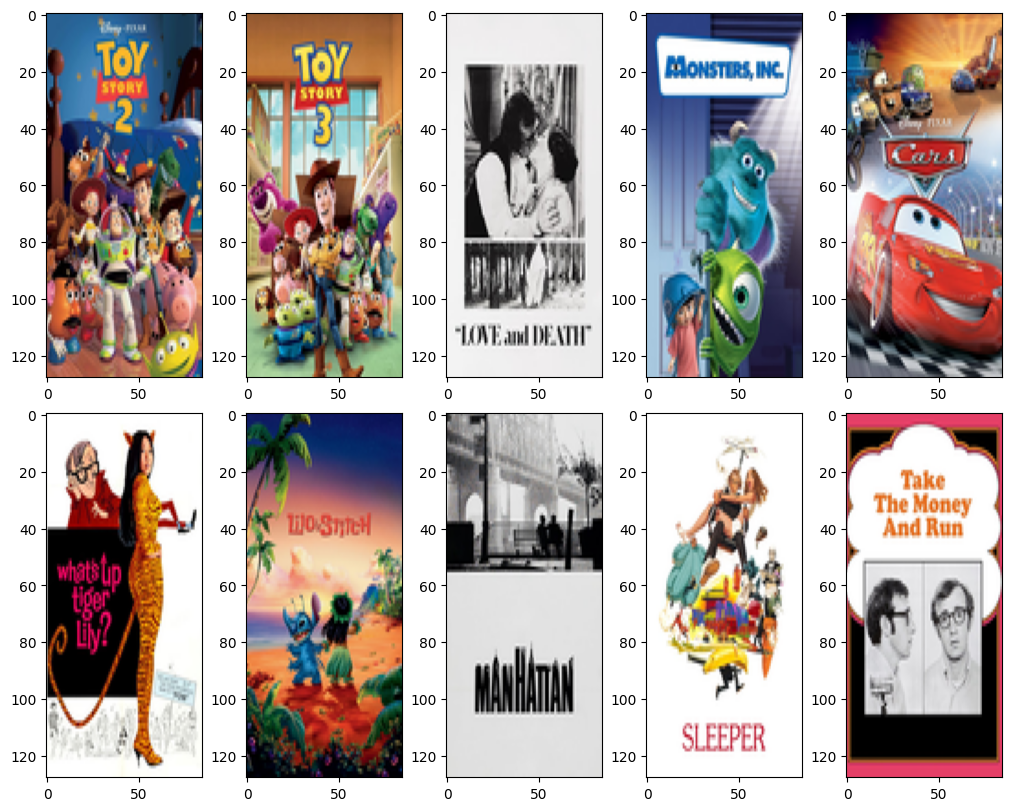

In [66]:
get_similars('Toy Story (1995)', n=10)

# SVD

In [75]:
_, ratings, _, _ = load_movies_ratings_tags_links(dirpath)

./new/ml-latest-small/


In [78]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)




Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8740  0.8763  0.8708  0.8757  0.8708  0.8735  0.0023  
MAE (testset)     0.6720  0.6725  0.6681  0.6713  0.6702  0.6709  0.0016  
Fit time          1.85    1.72    1.52    2.69    1.50    1.85    0.44    
Test time         0.94    0.16    0.31    0.16    0.13    0.34    0.30    


{'test_rmse': array([0.87397859, 0.87625161, 0.87078798, 0.87573837, 0.87083595]),
 'test_mae': array([0.67203555, 0.67249163, 0.66814387, 0.6713432 , 0.67024437]),
 'fit_time': (1.8507781028747559,
  1.7190296649932861,
  1.5150809288024902,
  2.689378261566162,
  1.4997546672821045),
 'test_time': (0.9365594387054443,
  0.15607380867004395,
  0.31376123428344727,
  0.16484689712524414,
  0.13366270065307617)}

In [80]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [82]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=4.077402919935256, details={'was_impossible': False})